# 26JAN23 Lecture Code
Module: Introduction to BIOL 1435 & Evolutionary Genetics \
Topic: Course overview and evolution refresher.

In [1]:
# Import modules.
import demes
import demesdraw
import matplotlib
from matplotlib import pyplot as plt
import msprime
import numpy as np
import toyplot
import toyplot.svg
import toytree
# Print versions.
print('demes', demes.__version__)
print('demesdraw', demesdraw.__version__)
print('matplotlib', matplotlib.__version__)
print('msprime', msprime.__version__)
print('numpy', np.__version__)
print('toyplot', toyplot.__version__)
print('toytree', toyplot.__version__)

demes 0.2.2
demesdraw 0.3.1
matplotlib 3.6.3
msprime 1.2.0
numpy 1.23.5
toyplot 1.0.3
toytree 1.0.3


## Simulate and visualize the allele frequency change over 1000 generations for a population of 1000 diploids

In [2]:
# Intialize the number of replicate simulations.
reps = 5
# Intialize the population size.
N = 1000
# Intialize the starting frequency.
p = 0.5
# Intialize the number of generations to simulate.
gens = 1000
# Intialize a random seed for reporducibility.
np.random.seed(42)
# Intailize a matrix to store the simulated results.
freq_mat = np.zeros((reps, gens))
# Set the first generation to the starting frequency.
freq_mat[:, 0] = p
# For every replicate...
for rep in range(reps):
    # For every generation...
    for gen in range(gens - 1):
        # Sample two alleles per diploid sample.
        genotypes = np.random.binomial(n=2, p=freq_mat[rep, gen], size=2*N)
        # Determine the allele frequency in the current generation.
        freq = genotypes.sum() / (genotypes.size * 2)
        # Update the results matrix.
        freq_mat[rep, gen + 1] = freq

In [3]:
# Intialize a canvas.
canvas = toyplot.Canvas(
    width=500, height=325,
)
# Intialize and label the axes.
axes = canvas.cartesian(
    xlabel='Time (generations)',
    ylabel='Allele Frequency (<i>p</i>)',
)
# Intialize a label  style.
label_style = {
    'text-anchor': 'start',
    '-toyplot-anchor-shift':'5px',
}
# Plot the change in allele frequency over time.
axes.plot(freq_mat.T)
# For every replicate...
for i in range(freq_mat.shape[0]):
    # Label 
    axes.text(
        1000, # X coord.
        freq_mat[i][-1], # Y coord.
        f'Rep. {i}',
        style=label_style,
    )
# Relabel the x-ticks.
axes.x.ticks.locator = toyplot.locator.Explicit(
    [1, 500, 1000],
    ['1', '500', '1000'],
)
# Title the plot.
axes.label.text = 'Genetic Drift'

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="325.0px" viewBox="0 0 500.0 325.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t7441c6da264d4e87855b516bd2daaac0"> <path d="M 50.0 200.0 L 50.36334568708669 201.95 L 50.72669137417339 202.025 L 51.090037061260084 203.52499999999998 L 51.453382748346776 206.975 L 51.81672843543347 209.52500000000003 L 52.18007412252017 206.82500000000002 L 52.54341980960686 208.84999999999997 L 52.90676549669355 209.00000000000003 L 53.270111183780244 205.24999999999997 L 53.633456870866944 201.27499999999998 L 53.996802557953636 199.02500000000003 L 54.36014824504033 204.05 L 54.723493932127035 205.40000000000003 L 55.08683961921372 208.02499999999998 L 55.45018530630041 211.925 L 55.813530993387104 209.52500000000003 L 56.176876680473804 211.54999999999998 L 56.5402223675605 213.42499999999998 L 56.90356805464719 214.02500000000003 L 57.266913741733894 214.39999999999998 L 57.63025942882058 213.275 L 57.99360511590728 214.47500000000002 L 58.356950802993964 215.075 L 58.72029649008066 216.95000000000002 L 59.08364217716736 221.9 L 59.44698786425405 218.45 L 59.810333551340754 220.1 L 60.17367923842744 219.27499999999998 L 60.53702492551414 217.25000000000003 L 60.900370612600824 216.95000000000002 L 61.26371629968752 217.4 L 61.62706198677422 216.35000000000002 L 61.99040767386091 215.82500000000005 L 62.35375336094761 215.45000000000002 L 62.7170990480343 211.025 L 63.080444735121 213.275 L 63.443790422207684 212.375 L 63.80713610929438 212.45 L 64.17048179638108 213.35 L 64.53382748346777 214.77499999999998 L 64.89717317055447 211.69999999999996 L 65.26051885764116 211.24999999999997 L 65.62386454472787 208.92499999999998 L 65.98721023181454 208.10000000000002 L 66.35055591890125 210.72499999999997 L 66.71390160598794 212.075 L 67.07724729307463 216.27500000000003 L 67.44059298016133 221.37499999999997 L 67.80393866724802 219.95 L 68.16728435433473 222.05 L 68.5306300414214 221.825 L 68.89397572850811 221.37499999999997 L 69.2573214155948 219.35000000000002 L 69.6206671026815 218.22500000000002 L 69.98401278976819 218.75 L 70.34735847685488 217.99999999999997 L 70.71070416394159 216.875 L 71.07404985102826 215.74999999999997 L 71.43739553811497 215.37500000000003 L 71.80074122520166 213.275 L 72.16408691228835 216.64999999999998 L 72.52743259937505 223.62499999999997 L 72.89077828646174 222.05 L 73.25412397354845 223.325 L 73.61746966063512 220.85 L 73.98081534772183 219.04999999999998 L 74.34416103480852 217.70000000000002 L 74.70750672189521 217.54999999999998 L 75.0708524089819 216.125 L 75.4341980960686 213.72500000000002 L 75.7975437831553 210.425 L 76.16088947024198 206.975 L 76.52423515732869 205.85000000000002 L 76.88758084441538 204.275 L 77.25092653150207 200.37499999999997 L 77.61427221858877 202.17499999999998 L 77.97761790567546 202.925 L 78.34096359276217 203.225 L 78.70430927984884 205.40000000000003 L 79.06765496693555 202.925 L 79.43100065402224 204.05 L 79.79434634110893 201.8 L 80.15769202819563 202.09999999999997 L 80.52103771528232 202.62499999999997 L 80.88438340236902 201.72499999999997 L 81.2477290894557 202.4 L 81.61107477654241 201.72499999999997 L 81.9744204636291 202.17499999999998 L 82.3377661507158 206.37500000000003 L 82.70111183780249 203.825 L 83.06445752488918 201.5 L 83.42780321197588 199.25 L 83.79114889906256 198.12500000000003 L 84.15449458614927 198.725 L 84.51784027323596 203.52499999999998 L 84.88118596032265 205.02500000000003 L 85.24453164740935 204.725 L 85.60787733449604 203.37499999999997 L 85.97122302158274 202.70000000000002 L 86.33456870866942 206.82500000000002 L 86.6

In [4]:
# Save as a svg.
toyplot.svg.render(canvas, '../figures/26jan23_drift_sim.svg')

## Plot all inferred gene trees from Cui, Rongfeng, et al. "Phylogenomics reveals extensive reticulate evolution in _Xiphophorus_ fishes." _Evolution_ 67.8 (2013): 2166-2179.

In [5]:
# Load the gene trees as a multitree object.
gene_trees = toytree.mtree('../data/xip_gene_trees.nex')
# List the species like in figure 4 .
species_list = [
    'Priapella','Psjonesii', 'Xmayae',
    'Xalvarezi', 'Xhellerii', 'Xsignum',
    'Xmonticolus', 'Xclemenciae_G','Xbirchmanni_GARC',
    'Xmalinche_CHIC2', 'Xcortezi', 'Xnezahuacoyotl',
    'Xmontezumae', 'Xcontinens', 'Xpygmaeus',
    'Xmultilineatus', 'Xnigrensis', 'Xgordoni',
    'Xmeyeri', 'Xcouchianus', 'Xxiphidium',
    'Xvariatus', 'Xevelynae', 'Xmilleri',
    'Xandersi', 'Xmaculatus_JpWild',
]

In [6]:
# Plot the cloud tree.
canvas, axes, mark = gene_trees.draw_cloud_tree(
    height=500, width=325,
    edge_style={
        'stroke': toyplot.color.Palette()[0],
        'stroke-opacity': 0.025,
    },
    fixed_order=species_list,
    tip_labels=[
        '{}. {}'.format(i[0], i[1:]) for i in gene_trees.treelist[0].get_tip_labels()
    ],
)
# Set all tips to start at x = 0 + 0.05 .
xlocs = np.zeros(gene_trees.ntips) + 0.05
# Generate y-axis values for all tips.
ylocs = np.arange(gene_trees.ntips)
# Create a list of colors specified by clade.
clade_colors = np.concatenate([
    [toytree.colors[2]] * 2,
    [toytree.colors[1]] * 6,
    [toytree.colors[5]] * 9,
    [toytree.colors[4]] * 9,
])
# Plot the clade labels as nodes using a scatterplot.
axes.scatterplot(
    xlocs, ylocs,
    color=clade_colors, size=7,
);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="325.0px" height="500.0px" viewBox="0 0 325.0 500.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t403bda764b97401f920faaa348ee0372"> X. malinche_CHIC2 X. birchmanni_GARC X. cortezi X. nezahuacoyotl X. montezumae X. nigrensis X. multilineatus X. pygmaeus X. continens X. mayae X. alvarezi X. hellerii X. signum X. monticolus X. clemenciae_G X. meyeri X. gordoni X. couchianus X. variatus X. evelynae X. milleri X. xiphidium X. andersi X. maculatus_JpWild P. sjonesii P. riapella <path d="M 149.0 234.9 L 166.2 227.4" id=

In [7]:
# Save as a svg.
toyplot.svg.render(canvas, '../figures/26jan23_gene_trees.svg')

## Plot the out of Africa with archaic admixture model from Ragsdale, Aaron P., and Simon Gravel. "Models of archaic admixture and recent history from two-locus statistics." _PLoS genetics_ 15.6 (2019): e1008204.

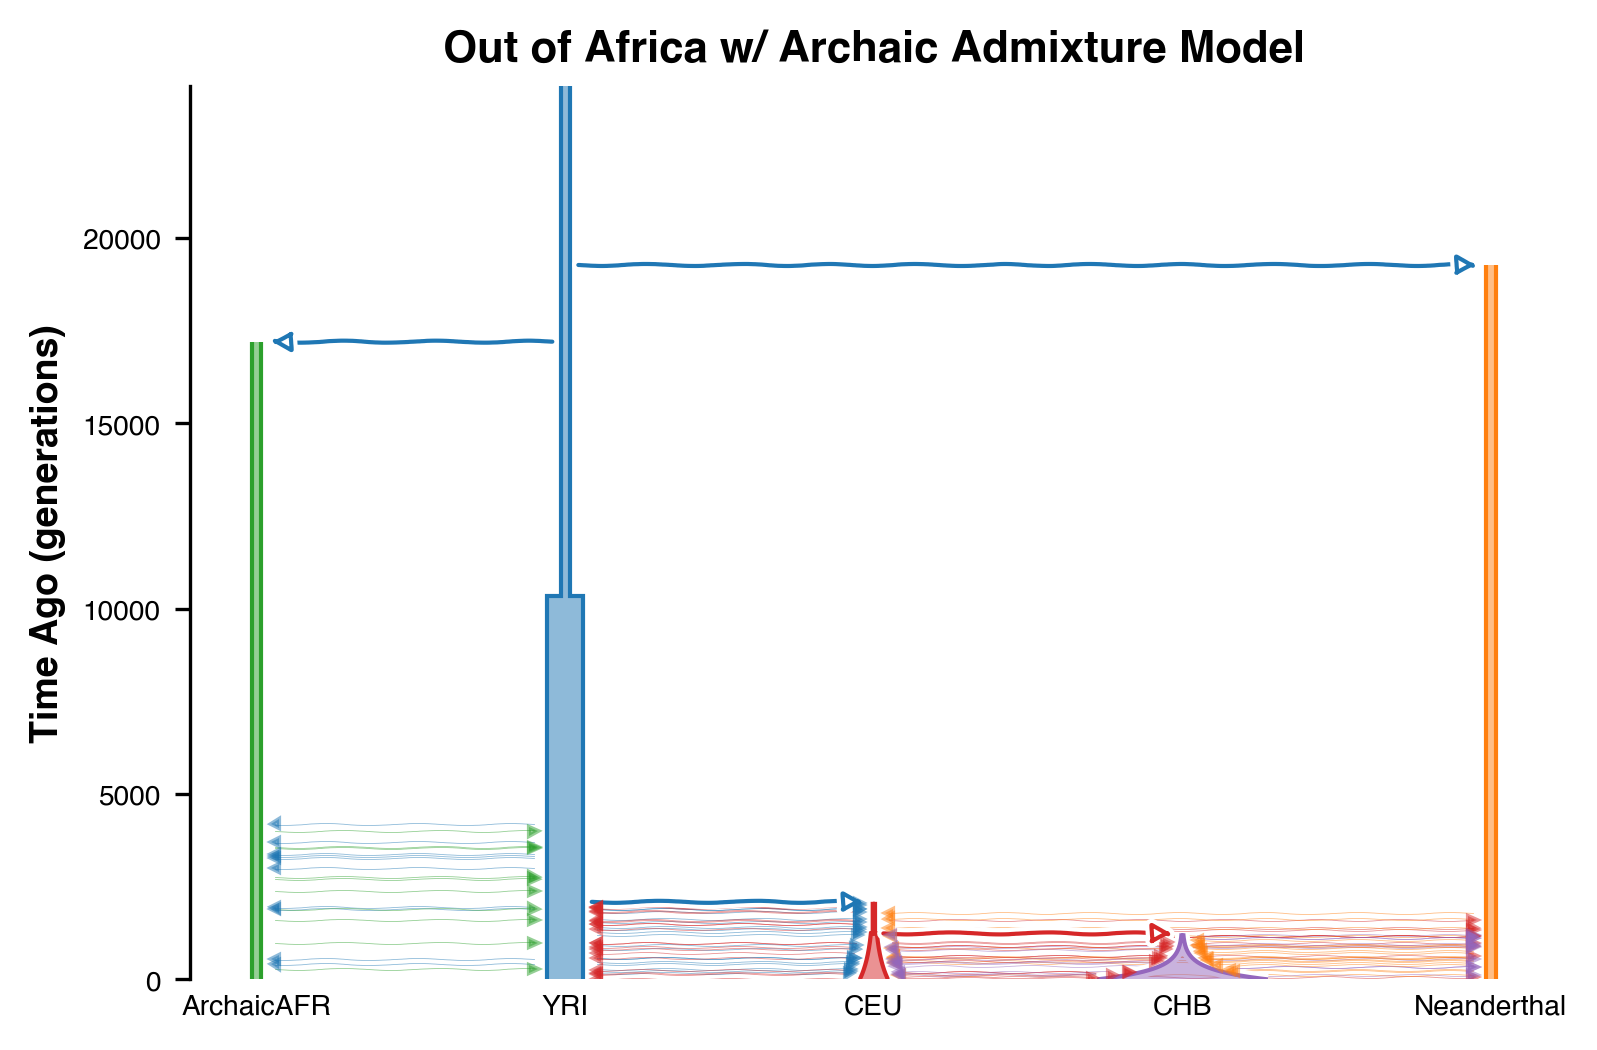

In [8]:
# Load the demographic model as a demes graph.
org_ooa_aa_graph = demes.load('../data/HomSap__OutOfAfricaArchaicAdmixture_5R19.yaml')
# Update the matplolib style to mimic the toyplot style.
plt.rcParams.update({
    'figure.figsize': (toyplot.units.convert('500px', 'in'), toyplot.units.convert('325px', 'in')),
    'font.family': 'sans-serif',
    'font.sans-serif': 'Helvetica',
    'font.size': toyplot.units.convert('9px', 'pt'),
    'axes.titlesize': toyplot.units.convert('14px', 'pt'),
    'axes.titleweight': 'bold',
    'axes.labelsize': toyplot.units.convert('12px', 'pt'),
    'axes.labelweight': 'bold',
})
# Intialize the figure.
fig = plt.figure(constrained_layout=True, dpi=300.0)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot the demes graph.
demesdraw.tubes(org_ooa_aa_graph, ax=ax, seed=42)
# Label the y-axis.
ax.set_ylabel('Time Ago (generations)')
# Title the figure.
ax.set_title('Out of Africa w/ Archaic Admixture Model')
# Save as a svg.
plt.savefig('../figures/26jan23_ooa_aa.svg', dpi=300, format='svg')
# Show the figure.
plt.show()

## Simulate and visualize a selective sweep

In [9]:
# Intialize the efffective population size.
Ne = 1e3
# Intialize the length of simulated region.
L = 1e6
# Intialize the number of simulated replicates.
num_reps = 100
# Define the slective sweep model.
sweep_model = msprime.SweepGenicSelection(
    position=L / 2,  # Location of the beneficial mutation.
    start_frequency=1.0 / (2 * Ne), 
    end_frequency=1.0 - (1.0 / (2 * Ne)),
    s=0.25, # Selection coefficient of the benefecial mutation.
    dt=1e-6,
)
# Simulate a selective sweep that occurs in the immediate past,
# followed by the neutral coalescent for the rest of history.
reps = msprime.sim_ancestry(
    5,
    model=[sweep_model, msprime.StandardCoalescent()],
    population_size=Ne,
    recombination_rate=1e-7,
    sequence_length=L,
    num_replicates=num_reps,
    random_seed=42,
)
# Create start and end points for 50kb windows.
wins = np.linspace(0, L, 21)
# Determine the midpoint of each window.
mids = (wins[1:] + wins[:-1]) / 2
# Intialize a results matrix.
diversity = np.zeros((num_reps, mids.size))
# For every replicate simulation...
for rep, ts in enumerate(reps):
    # Estimate diversity (aka pi).
    diversity[rep] = ts.diversity(windows=wins, mode='branch')

In [10]:
# Intialize a canvas.
canvas = toyplot.Canvas(
    width=500, height=325,
)
# Intialize and label the axes.
axes = canvas.cartesian(
    xlabel='Position (bp)',
    ylabel=u'Branch \u03c0',
)

# Plot the neutral expectation.
neutral = axes.plot(
    mids, np.full((mids.size), 4 * Ne), # pi = 4 * Ne
    style={'stroke-dasharray': 5},
)
# Plot the simulated sweep.
sweep = axes.plot(mids, diversity.mean(axis=0))
# Plot the legend.
canvas.legend(
    [('Neutral Expectation', neutral), ('Simulated Sweep', sweep)],
    corner=('bottom-left', 50, 50, 50),
)
# Title the plot.
axes.label.text = 'Selective Sweep'

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="325.0px" viewBox="0 0 500.0 325.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t9d289eb6b3b54933b794888a934a2b1e"> <path d="M 60.0 75.81574765981159 L 80.0 88.48233249073397 L 100.0 99.46949994050351 L 120.0 83.61542589943596 L 140.0 109.63564023661058 L 160.0 123.57715061012027 L 180.0 135.7876779577006 L 200.0 174.63567882702395 L 220.0 211.11728992074924 L 240.0 266.14453249223203 L 260.0 269.67990017427417 L 280.0 200.4963097905976 L 300.0 155.4307799651252 L 320.0 128.6519937985514 L 340.0 107.73000802939674 L 360.0 95.79774462587912 L 380.0 93.45207383913927 L 400.0 81.77218487372075 L 420.0 73.49261983780238 L 440.0 72.70752393209852" style="stroke:rgb(98.8%,55.3%,38.4%);stroke-opacity:1.0;stroke-width:2.0"> 0 500000 1000000 Position (bp) 1000 2000 3000 4000 Branch π Selective Sweep Neutral Expectation Simulated Sweep

In [11]:
# Save as a svg.
toyplot.svg.render(canvas, '../figures/26jan23_sel_sweep.svg')